# First attempt of clustering the publications from Science Mag.

#### Steps of BERTopic

![Alt text](./image/StepsOfBerTopic.png)

### Customizing is also possible
![Alt text](./image/Custmizing_SemanticScholar_Steps.png)

In [271]:
import pandas as pd
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth', 100)
from custom_functions import cf_clustering as cfc

# This is required when you're using jupyter notebook and want to make changes to your custom function
import importlib
importlib.reload(cfc)


<module 'custom_functions.cf_clustering' from '/home/pclinux/spiced/data_science/capstone_project/convergence_oracle/Playground_KT/fetching/0_Semantic_API_kt/custom_functions/cf_clustering.py'>

# BERTopic on a single year

Length of the dataset:  104


,title,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,publicationDate,name,title_abstract_studyfield
0,THE SOCIETY OF AMERICAN BACTERIOLOGISTS.,"I was very much interested in your memorandum on Cosmic Microbiology, and share your concern ove...",1900,0,1,0,['Medicine'],1900-01-26,Science,"SOCIETY AMERICAN BACTERIOLOGISTS. interested memorandum Cosmic Microbiology, share concern soon ..."
1,DEGENERATION IN THE EYES OF THE COLDBLOODED VERTEBRATES OF THE NORTH AMERICAN CAVES.,"""Degeneration,"" says Lankester, ""may be defined as the gradual change of the structure in which ...",1900,0,2,0,"['Geography', 'Medicine']",1900-03-30,Science,"DEGENERATION EYES COLDBLOODED VERTEBRATES NORTH AMERICAN CAVES. ""Degeneration,"" says Lankester, ..."
2,THE ZEEMAN EFFECT.,Background: Electrons in atoms can be characterized by a unique set of discrete energy states. W...,1900,0,10,1,"['Physics', 'Medicine']",1900-08-24,Science,ZEEMAN EFFECT. Background: Electrons atoms characterized unique set discrete energy states. exci...
3,DIURNAL RANGE OF TEMPERATURES.,"DIURNAL RANGE O F TEMPERATURES. 'To THE EDITOR OF SCIENCE: In the last issue of SCIENCE, page 87...",1900,0,0,0,"['Environmental Science', 'Medicine']",1900-06-08,Science,"DIURNAL RANGE TEMPERATURES. DIURNAL RANGE O F TEMPERATURES. 'To EDITOR SCIENCE: issue SCIENCE, p..."
4,A DISCLAIMER,"Finally, for the benefit of both the aforementioned correspondents, I feel I must quote this ext...",1900,7,0,0,['Medicine'],1900-11-30,Science,"DISCLAIMER Finally, benefit aforementioned correspondents, feel quote extract annual report Dire..."


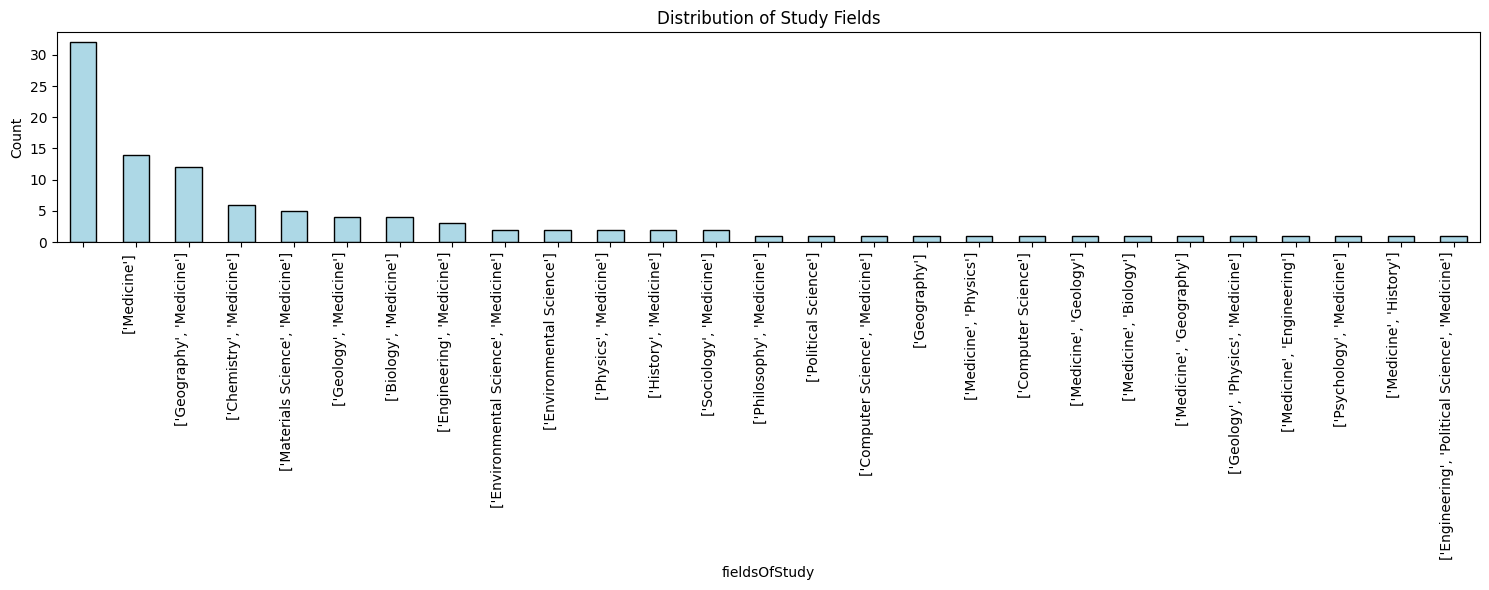

In [272]:
# Load and the data set and apply a year filter:
years = [1900]
sy_df = cfc.load_clean_dataset("./data/1880-2023_Science_48966.csv",years)
display(sy_df.head())
cfc.viz_study_field_distribution(sy_df)

In [273]:
# Create clusters for the selected single year: ...
sy_model,sy_topics,sy_proba = cfc.cluster_data(sy_df,min_topic_size=2,fine_tune_label=True,get_topics=True,get_proba=True,ngram=3)
# Saving the BERTopic model
sy_model.save("./models/bertopic_model_"+str(years[0]))
display(sy_model.get_topic_info())
sy_model.visualize_topics()

Model fitting completed in 0.09 minutes


,Topic,Count,Name,Representation,Representative_Docs
0,-1,23,-1_artificial parthenogenesis sea_parthenogenesis sea_parthenogenesis sea urchins_solution used ...,"[artificial parthenogenesis sea, parthenogenesis sea, parthenogenesis sea urchins, solution used...","[DIURNAL RANGE TEMPERATURES. DIURNAL RANGE O F TEMPERATURES. 'To EDITOR SCIENCE: issue SCIENCE, ..."
1,0,11,0_industrial chemistry_analytical chemistry_chemistry_atomic,"[industrial chemistry, analytical chemistry, chemistry, atomic, atom, analytical, electron, atom...","[Calculations Analytical Chemistry . E. H. Miller, Ph.D., Instructor Analytical Chemistry Assayi..."
2,1,8,1_medicine botanical notes_botanical notes medicine_medicine botanical_botanical club medicine,"[medicine botanical notes, botanical notes medicine, medicine botanical, botanical club medicine...","[BOTANICAL NOTES. Medicine, BOTANICAL NOTES. Medicine, Torrey Botanical Club]"
3,2,7,2_biological society washington_washington biological society_society washington biological_wash...,"[biological society washington, washington biological society, society washington biological, wa...","[Biological Society Washington, DISCLAIMER Finally, benefit aforementioned correspondents, feel ..."
4,3,6,3_nebraska geology medicine_geology medicine_geology_nebraska geology,"[nebraska geology medicine, geology medicine, geology, nebraska geology, geological survey, geol...","[FOSSIL SHELLS LOS ANGELES TUNNEL CLAYS. Geology Medicine, KANSAS ACADEMY SCIENCE. time required..."
5,4,5,4_knives prehistoric times_knives prehistoric_spearheads knives prehistoric_museum zoological notes,"[knives prehistoric times, knives prehistoric, spearheads knives prehistoric, museum zoological ...","['Arrowpoints, Spearheads Knives Prehistoric Times.', 'ARROWPOINTS, SPEARHEADS KNIVES PREHISTORI..."
6,5,5,5_astronomical instrument suggestion_phenomenon physics medicine_astronomical instrument_solar e...,"[astronomical instrument suggestion, phenomenon physics medicine, astronomical instrument, solar...","[GRAPHOPHONE AUXILIARY ASTRONOMICAL INSTRUMENT. SUGGESTION. Medicine, 0N KATHODE RAYS RELATED PH..."
7,6,5,6_aerial voyage medicine_voyage medicine_albatross geography medicine_voyage medicine exotic,"[aerial voyage medicine, voyage medicine, albatross geography medicine, voyage medicine exotic, ...","[CRUISE ALBATROSS. Geography Medicine, LONGEST AERIAL VOYAGE. Medicine, EXOTIC MOLLUSCA CALIFORN..."
8,7,4,7_sterna domesticated fowl_fowl deformed sterna_birds medicine_humanizing birds medicine,"[sterna domesticated fowl, fowl deformed sterna, birds medicine, humanizing birds medicine, fowl...","[ULKE COLLECTION COLEOPTERA. Geography Medicine, DEFORMED STERNA DOMESTICATED FOWL. Biology Medi..."
9,8,4,8_circle geography medicine_latitude geography medicine_geography medicine observations_geograph...,"[circle geography medicine, latitude geography medicine, geography medicine observations, geogra...","[Observations Meridian Circle, OBSERVATIONS MERIDIAN CIRCLE. Geography Medicine, INTERNATIONAL P..."


In [274]:
sy_embeddings = sy_model._extract_embeddings(sy_df['title_abstract_studyfield'].to_list(), method="document")
sy_embeddings.shape

(104, 384)

In [275]:
# 3d Distance for the topics
cfc.visualize_intertopic_distances_3d("_year_"+str(years[0]),sy_df,sy_topics,sy_model,sy_embeddings)

Step 1/3: Reducing the dimensions of the embeddings ...
Step 2/3: Calculating centroids ...
Step 3/3: Visualizing intertopic distances ...


# BERTopic on the whole Science data set

Length of the dataset:  48966


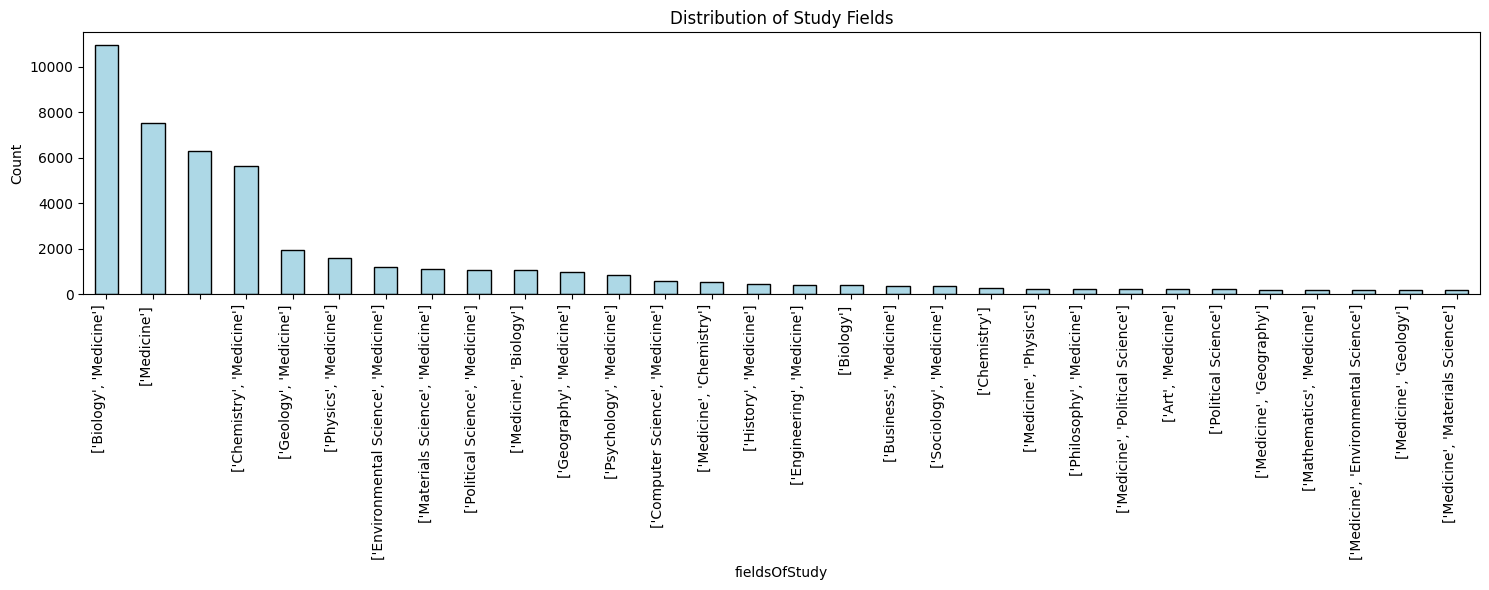

In [242]:
# Load the whole dataset
df = cfc.load_clean_dataset("./data/1880-2023_Science_48966.csv")
cfc.viz_study_field_distribution(df,30)

In [243]:
# Creating clusters for the whole data set
model,topics,proba = cfc.cluster_data(df,min_topic_size=50,fine_tune_label=True,get_topics=True,get_proba=True,ngram=2)
# Saving the BERTopic model
model.save("./models/bertopic_model_whole_data_set.brt")
df = cfc.add_topic_labels(df,topics,proba,model)
display(model.get_topic_info())
model.visualize_topics()

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

/home/pclinux/spiced/data_science/capstone_project/convergence_oracle/.venv/lib/python3.10/site-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



,title,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,publicationDate,name,title_abstract_studyfield,topic_code,proba,topic_list,best_topic
0,Partitioning Regulatory Mechanisms of Within-Host Malaria Dynamics Using the Effective Propagati...,"As malaria progresses, red blood cell availability and immune control change depending on the in...",2011,41,79,1,"['Biology', 'Medicine']",2011-08-19,Science,Partitioning Regulatory Mechanisms Within-Host Malaria Dynamics Using Effective Propagation Numb...,41,0.914104,"[(plasmodium falciparum, 0.67316216), (parasite plasmodium, 0.66920984), (malaria parasite, 0.63...",plasmodium falciparum
1,Embryonic Death Rate and Sex Ratio in Chicks,,1950,1,0,0,,1950-12-29,Science,Embryonic Death Rate Sex Ratio Chicks,-1,0.000000,"[(gene, 0.29642743), (science medicine, 0.2911867), (scientific, 0.28443968), (molecular, 0.2807...",gene
2,The biochemical basis of microRNA targeting efficacy,Biochemical prediction of miRNA targeting MicroRNAs (miRNAs) regulate most human messenger RNAs ...,2018,57,422,32,"['Biology', 'Medicine']",2018-09-11,Science,biochemical basis microRNA targeting efficacy Biochemical prediction miRNA targeting MicroRNAs (...,40,0.754384,"[(epigenetic, 0.5705223), (chromatin, 0.50475293), (dna methylation, 0.5035247), (histone h3, 0....",epigenetic
3,A silicon Brillouin laser,"Making silicon shine bright Silicon is the workhorse of the semiconductor electronics industry, ...",2017,48,205,5,"['Materials Science', 'Medicine', 'Physics']",2017-05-16,Science,silicon Brillouin laser Making silicon shine bright Silicon workhorse semiconductor electronics ...,-1,0.000000,"[(gene, 0.29642743), (science medicine, 0.2911867), (scientific, 0.28443968), (molecular, 0.2807...",gene
4,The biological actions and therapeutic applications of the B-chloroethyl amines and sulfides.,,1946,7,568,1,"['Chemistry', 'Medicine']",1946-04-05,Science,biological actions therapeutic applications B-chloroethyl amines sulfides. Chemistry Medicine,-1,0.000000,"[(gene, 0.29642743), (science medicine, 0.2911867), (scientific, 0.28443968), (molecular, 0.2807...",gene


,Topic,Count,Name,Representation,Representative_Docs
0,-1,23424,-1_gene_science medicine_scientific_molecular,"[gene, science medicine, scientific, molecular, genetic, genes, dna, biology medicine, chemistry...",[Commensal microbiota patients inflammatory bowel disease produce genotoxic metabolites Microbio...
1,0,2915,0_neurons_neuronal_neuron_neural,"[neurons, neuronal, neuron, neural, cortex, brain, hippocampus, hippocampal, cortical, synaptic]",[Neural population control deep image synthesis Predicting behavior visual neurons extent predic...
2,1,1092,1_plant cells_plant cell_arabidopsis_arabidopsis thaliana,"[plant cells, plant cell, arabidopsis, arabidopsis thaliana, pathogens, fungi, pathogen, genes, ...",[mechanics plant morphogenesis Understanding mechanism patterned gene activity leads mechanical ...
3,2,794,2_physical chemistry_materials science_chemistry_medicine chemistry,"[physical chemistry, materials science, chemistry, medicine chemistry, chemistry medicine, medic...","[Materials science applied science. Medicine, RATE WORK RICKSHA-COOLIE. Materials Science Medici..."
4,3,641,3_honey bees_bees_honey bee_bee,"[honey bees, bees, honey bee, bee, honeybees, insecticides, insects, pests, pesticides, entomology]",[Engineered symbionts activate honey bee immunity limit pathogens Inducing immune bee genes Hone...
5,4,516,4_marine ecosystems_fisheries_fishery_coral reefs,"[marine ecosystems, fisheries, fishery, coral reefs, marine animals, reefs, ecosystem, reef, eco...","[Action Coral Reefs 11th International Coral Reef Symposium (ICRS) held July Fort Lauderdale, Fl..."
6,5,500,5_biodiversity conservation_global biodiversity_biodiversity_biodiversity loss,"[biodiversity conservation, global biodiversity, biodiversity, biodiversity loss, ecological, ec...",[Overcoming coupled climate biodiversity crises societal impacts Earth’s biodiversity human soci...
7,6,497,6_antarctic ice_greenland ice_glacial_glaciers,"[antarctic ice, greenland ice, glacial, glaciers, climate change, antarctic, ice sheet, glacier,...","[Glacial Maximum Melting Details Global sea level rises falls ice sheets glaciers melt grow, pro..."
8,7,475,7_ancient dna_neolithic_pleistocene_ancestry,"[ancient dna, neolithic, pleistocene, ancestry, neanderthals, ancestors, archaeological, genomes...",[Ancient DNA reveals multistep spread herders sub-Saharan Africa East African genetics pastorali...
9,8,459,8_political science_medicine political_science political_medicine politics,"[political science, medicine political, science political, medicine politics, research political...","[WASHINGTON SCIENCE. Political Science Medicine, R & d employment u.s.s.R. Political Science Med..."


In [103]:
my_embeddings = model._extract_embeddings(df['title_abstract_studyfield'].to_list(), method="document")
my_embeddings.shape

(48966, 384)

In [168]:
topics

[2,
 8,
 -1,
 -1,
 26,
 -1,
 -1,
 -1,
 -1,
 -1,
 8,
 -1,
 -1,
 -1,
 -1,
 57,
 68,
 51,
 -1,
 -1,
 79,
 -1,
 75,
 27,
 -1,
 -1,
 1,
 0,
 -1,
 35,
 -1,
 30,
 8,
 8,
 -1,
 -1,
 -1,
 66,
 7,
 -1,
 98,
 69,
 10,
 54,
 97,
 -1,
 -1,
 16,
 24,
 2,
 95,
 -1,
 18,
 5,
 84,
 83,
 -1,
 9,
 -1,
 -1,
 12,
 -1,
 -1,
 27,
 -1,
 -1,
 5,
 32,
 -1,
 -1,
 -1,
 61,
 114,
 39,
 -1,
 -1,
 -1,
 41,
 -1,
 -1,
 36,
 -1,
 -1,
 -1,
 108,
 124,
 36,
 -1,
 -1,
 53,
 -1,
 -1,
 105,
 -1,
 48,
 -1,
 31,
 21,
 -1,
 -1,
 36,
 10,
 -1,
 89,
 1,
 -1,
 1,
 43,
 -1,
 -1,
 -1,
 77,
 -1,
 36,
 36,
 -1,
 16,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 54,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 3,
 10,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 22,
 -1,
 38,
 -1,
 -1,
 -1,
 4,
 21,
 20,
 98,
 31,
 61,
 -1,
 13,
 41,
 -1,
 75,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 54,
 21,
 119,
 29,
 12,
 -1,
 0,
 -1,
 19,
 -1,
 -1,
 -1,
 -1,
 35,
 -1,
 -1,
 -1,
 2,
 25,
 -1,
 -1,
 -1,
 12,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 24,
 -1

In [246]:
cfc.visualize_intertopic_distances_3d(df,topics,model,my_embeddings)

Step 1/3: Reducing the dimensions of the embeddings ...
Step 2/3: Calculating centroids ...
Step 3/3: Visualizing intertopic distances ...


In [125]:
my_embeddings.shape

(48966, 384)

In [162]:
df.head()

,title,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,publicationDate,name,title_abstract_studyfield,topic_code,proba,topic_list,best_topic
0,"Cells in Culture:\n Biology of Fibroblast\n . Proceedings of a symposium, Turku, Finland, Aug. 1...",,1975,0,0,0,,1975-01-31,Science,"Cells Culture: Biology Fibroblast . Proceedings symposium, Turku, Finland, Aug. 1972. E. Kulonen...",2,0.952229,"[(marine ecosystems, 0.63954794), (fisheries, 0.5062736), (coral reefs, 0.47839198), (fishery, 0...",marine ecosystems
1,"Green revolution (I): a just technology, often unjust in use.",,1974,0,29,1,"['Political Science', 'Medicine']",1974-12-20,Science,"Green revolution (I): just technology, unjust use.. . Political Science, Medicine",8,0.486591,"[(lunar samples, 0.5543606), (meteorites, 0.4395031), (lunar surface, 0.42918652), (meteorite, 0...",lunar samples
2,Protein interaction mapping in C. elegans using proteins involved in vulval development.,Protein interaction mapping using large-scale two-hybrid analysis has been proposed as a way to ...,2000,50,801,23,"['Biology', 'Medicine']",2000-01-07,Science,Protein interaction mapping C. elegans using proteins involved vulval development.. Protein inte...,-1,0.000000,"[(cells, 0.39353842), (cell, 0.36536178), (genes, 0.3637211), (biological, 0.35699922), (biology...",cells
3,Structure of collagen in cartilage of intervertebral disk.,Small-angle x-ray and neutron diffraction patterns have been obtained from the annulus fibrosus ...,1978,7,21,0,"['Materials Science', 'Medicine']",1978-02-03,Science,Structure collagen cartilage intervertebral disk.. Small-angle x-ray neutron diffraction pattern...,-1,0.000000,"[(cells, 0.39353842), (cell, 0.36536178), (genes, 0.3637211), (biological, 0.35699922), (biology...",cells
4,A Point of View,Korinth et al found that their success rate was significantly higher after anterior microdiscect...,1968,0,0,0,,1968-07-19,Science,Point View. Korinth et al success rate significantly higher anterior microdiscectomy polymethyl ...,26,1.000000,"[(coronavirus sarscov2, 0.61127317), (syndrome coronavirus, 0.55161893), (coronavirus disease, 0...",coronavirus sarscov2


In [147]:
np.bincount(topics)

ValueError: 'list' argument must have no negative elements

In [127]:
np.unique(topics)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131])

In [100]:
df.head()

,title,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,publicationDate,name,title_abstract_studyfield
0,"Cells in Culture:\n Biology of Fibroblast\n . Proceedings of a symposium, Turku, Finland, Aug. 1...",,1975,0,0,0,,1975-01-31,Science,"Cells Culture: Biology Fibroblast . Proceedings symposium, Turku, Finland, Aug. 1972. E. Kulonen..."
1,"Green revolution (I): a just technology, often unjust in use.",,1974,0,29,1,"['Political Science', 'Medicine']",1974-12-20,Science,"Green revolution (I): just technology, unjust use.. . Political Science, Medicine"
2,Protein interaction mapping in C. elegans using proteins involved in vulval development.,Protein interaction mapping using large-scale two-hybrid analysis has been proposed as a way to ...,2000,50,801,23,"['Biology', 'Medicine']",2000-01-07,Science,Protein interaction mapping C. elegans using proteins involved vulval development.. Protein inte...
3,Structure of collagen in cartilage of intervertebral disk.,Small-angle x-ray and neutron diffraction patterns have been obtained from the annulus fibrosus ...,1978,7,21,0,"['Materials Science', 'Medicine']",1978-02-03,Science,Structure collagen cartilage intervertebral disk.. Small-angle x-ray neutron diffraction pattern...
4,A Point of View,Korinth et al found that their success rate was significantly higher after anterior microdiscect...,1968,0,0,0,,1968-07-19,Science,Point View. Korinth et al success rate significantly higher anterior microdiscectomy polymethyl ...


In [101]:
df['title_abstract_studyfield'][2]

,title,abstract,year,referenceCount,citationCount,influentialCitationCount,fieldsOfStudy,publicationDate,name,title_abstract_studyfield,topic_code,proba,topic_list,best_topic
0,"Cells in Culture:\n Biology of Fibroblast\n . Proceedings of a symposium, Turku, Finland, Aug. 1...",,1975,0,0,0,,1975-01-31,Science,"Cells Culture: Biology Fibroblast . Proceedings symposium, Turku, Finland, Aug. 1972. E. Kulonen...",2,0.952229,"[(marine ecosystems, 0.63954794), (fisheries, 0.5062736), (coral reefs, 0.47839198), (fishery, 0...",marine ecosystems
1,"Green revolution (I): a just technology, often unjust in use.",,1974,0,29,1,"['Political Science', 'Medicine']",1974-12-20,Science,"Green revolution (I): just technology, unjust use.. . Political Science, Medicine",8,0.486591,"[(lunar samples, 0.5543606), (meteorites, 0.4395031), (lunar surface, 0.42918652), (meteorite, 0...",lunar samples
2,Protein interaction mapping in C. elegans using proteins involved in vulval development.,Protein interaction mapping using large-scale two-hybrid analysis has been proposed as a way to ...,2000,50,801,23,"['Biology', 'Medicine']",2000-01-07,Science,Protein interaction mapping C. elegans using proteins involved vulval development.. Protein inte...,-1,0.000000,"[(cells, 0.39353842), (cell, 0.36536178), (genes, 0.3637211), (biological, 0.35699922), (biology...",cells
3,Structure of collagen in cartilage of intervertebral disk.,Small-angle x-ray and neutron diffraction patterns have been obtained from the annulus fibrosus ...,1978,7,21,0,"['Materials Science', 'Medicine']",1978-02-03,Science,Structure collagen cartilage intervertebral disk.. Small-angle x-ray neutron diffraction pattern...,-1,0.000000,"[(cells, 0.39353842), (cell, 0.36536178), (genes, 0.3637211), (biological, 0.35699922), (biology...",cells
4,A Point of View,Korinth et al found that their success rate was significantly higher after anterior microdiscect...,1968,0,0,0,,1968-07-19,Science,Point View. Korinth et al success rate significantly higher anterior microdiscectomy polymethyl ...,26,1.000000,"[(coronavirus sarscov2, 0.61127317), (syndrome coronavirus, 0.55161893), (coronavirus disease, 0...",coronavirus sarscov2


'Protein interaction mapping C. elegans using proteins involved vulval development.. Protein interaction mapping using large-scale two-hybrid analysis proposed way functionally annotate large numbers uncharacterized proteins predicted complete genome sequences. approach examined Caenorhabditis elegans, starting 27 proteins involved vulval development. resulting map reveals known new potential interactions provides functional annotation approximately 100 uncharacterized gene products. protein interaction mapping project feasible C. elegans genome-wide scale contribute understanding molecular mechanisms organism human diseases.. Biology, Medicine'

In [92]:
# Assuming you have already fitted a BERTopic model
topic_info_df = model.get_topic_info()

# Display the contents of the DataFrame
display(topic_info_df)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,25775,-1_cells_cell_genes_biological,"[cells, cell, genes, biological, biology, gene, biology medicine, rna, signaling, cellular]",[Control signaling-mediated clearance apoptotic cells tumor suppressor p53. Tumor suppressor p53...
1,0,710,0_organic chemistry_physical chemistry_chemistry_chemical analysis,"[organic chemistry, physical chemistry, chemistry, chemical analysis, compounds, chemical, inorg...","[Chemical Processes: Inorganic Reaction Mechanisms . John O. Edwards, Ed. Interscience (Wiley), ..."
2,1,660,1_honey bees_bees_honey bee_bee,"[honey bees, bees, honey bee, bee, honeybees, pollination, insecticides, insects, insect, entomo...",[Honey Bees Humans: Shared Innovation. discussion sequencing genome honey bee (“Honey bee genome...
3,2,600,2_marine ecosystems_fisheries_coral reefs_fishery,"[marine ecosystems, fisheries, coral reefs, fishery, coral reef, ecological, reefs, reef, ecosys...",[Socioeconomic impacts marine heatwaves: Global issues opportunities. Description impacts marine...
4,3,591,3_biodiversity_biodiversity conservation_biodiversity loss_ecological,"[biodiversity, biodiversity conservation, biodiversity loss, ecological, ecosystem, ecology, eco...",[biodiversity Anthropocene. Fire's growing impacts ecosystems played prominent role evolution bi...
5,4,495,4_medicine geology_geology medicine_medicine geological_geology,"[medicine geology, geology medicine, medicine geological, geology, geology mineralogy, us geolog...","[PROGRESS GEOLOGICAL SURVEY CALIFORNIA.. . Geology, Medicine, WORK U. S. GEOLOGICAL SURVEY, 1899..."
6,5,465,5_antarctic ice_greenland ice_global warming_climate variability,"[antarctic ice, greenland ice, global warming, climate variability, climate change, glacial, gla...",[Reconciled Estimate Ice-Sheet Mass Balance. Warming Melting Mass loss ice sheets Greenland Anta...
7,6,442,6_medicine political_political science_medicine science_medicine politics,"[medicine political, political science, medicine science, medicine politics, science political, ...","[BRITISH ASSOCIATION ADVANCEMENT SCIENCE.. . Political Science, Medicine, AMERICAN ASSOCIATION A..."
8,7,439,7_grad_academia_teaching_mentor,"[grad, academia, teaching, mentor, academic, graduate, science education, undergraduate, student...","[Undergrads charge.. entered main conference room chemistry building, feeling nervous. arrive, h..."
9,8,397,8_lunar samples_meteorites_lunar surface_meteorite,"[lunar samples, meteorites, lunar surface, meteorite, craters, carbonaceous chondrite, minerals,...",[Soluble organic molecules samples carbonaceous asteroid (162173) Ryugu. Hayabusa2 spacecraft co...


In [169]:
topic_dict = model.get_topics()
display(topic_dict)

{-1: [('cells', 0.39353842),
  ('cell', 0.36536178),
  ('genes', 0.3637211),
  ('biological', 0.35699922),
  ('biology', 0.34400976),
  ('gene', 0.33724687),
  ('biology medicine', 0.32562554),
  ('rna', 0.30138987),
  ('signaling', 0.28875923),
  ('cellular', 0.2751416)],
 0: [('organic chemistry', 0.6479808),
  ('physical chemistry', 0.5716927),
  ('chemistry', 0.5650265),
  ('chemical analysis', 0.56113935),
  ('compounds', 0.5523869),
  ('chemical', 0.5480026),
  ('inorganic', 0.52599186),
  ('chem', 0.5257069),
  ('chem soc', 0.48936027),
  ('chemistry medicine', 0.47308445)],
 1: [('honey bees', 0.5924258),
  ('bees', 0.58750814),
  ('honey bee', 0.5333501),
  ('bee', 0.5144168),
  ('honeybees', 0.48296338),
  ('pollination', 0.42899734),
  ('insecticides', 0.41749364),
  ('insects', 0.40489447),
  ('insect', 0.368145),
  ('entomology', 0.36035815)],
 2: [('marine ecosystems', 0.63954794),
  ('fisheries', 0.5062736),
  ('coral reefs', 0.47839198),
  ('fishery', 0.46860504),
  ('c

In [178]:
topic_dict[0]

[('organic chemistry', 0.6479808),
 ('physical chemistry', 0.5716927),
 ('chemistry', 0.5650265),
 ('chemical analysis', 0.56113935),
 ('compounds', 0.5523869),
 ('chemical', 0.5480026),
 ('inorganic', 0.52599186),
 ('chem', 0.5257069),
 ('chem soc', 0.48936027),
 ('chemistry medicine', 0.47308445)]

In [188]:
topic_dict[132]

KeyError: 132

In [191]:
best_labels  = []
for i in range(len(topic_dict)):
    best_labels.append(topic_dict[i-1][0][0])
print(best_labels)

['cells', 'organic chemistry', 'honey bees', 'marine ecosystems', 'biodiversity', 'medicine geology', 'antarctic ice', 'medicine political', 'grad', 'lunar samples', 'scientific community', 'steroid hormones', 'influenza viruses', 'vitamin b12', 'psychology medicine', 'ozone depletion', 'genetic variants', 'saturns magnetosphere', 'visual cortex', 'human hemoglobin', 'gene therapy', 'neutron stars', 'dopamine receptor', 'mathematics medicine', 'cancer cells', 'phosphorylation', 'radiation dose', 'coronavirus sarscov2', 'excitatory synapses', 'nuclear waste', 'pathogens', 'plant growth', 'protein design', 'nanostructures', 'micrornas', 'virustype hiv1', 'martian surface', 'antigen receptor', 'earthquake prediction', 'physics medicine', 'genetics evolution', 'parasite plasmodium', 'chemists chemical', 'art medicine', 'gut microbiota', 'circadian clocks', 'laboratory', 'photosynthetic organisms', 'calcium channels', 'insulin receptor', 'computer science', 'medicine news', 'superconductivi